<a href="https://colab.research.google.com/github/Ashsin78/DataScienceProject/blob/main/Capstone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Objective:** To predict whether the person is corona positive or not.

In this project we will try to answer the following questions:
1. Is the data is correct and sufficient for the purpose of model building and training?
2. Are there missing and duplicate values in the data that can affect our modeling?
3. Whether the given features are sufficient in correctly predicting the desired outcome(whether the person is corona positive or not)?
4. Is additional data/features required to achieve the desired objective?

Predicting whether the person is corona positive or not with the help of machine learning models can lessen the burden on healthcare system. Correct prediction of disease will lead to effective and timely treatment of disease which can potentially save lives.

Initial hypothesis is that data is sufficient to correctly predict whether to approve a credit card to customer or not .For verifying this we will clean the dataset and do feature engineering and model building and test their accuracy.

**Importing the necessary libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

**Reading the datasets**

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/corona_tested_006.csv")

<ipython-input-2-da896653e865>:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("/content/drive/MyDrive/corona_tested_006.csv")


**Checking the data information**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
df1.head(5)


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


**Checking for missing values**

In [ ]:
df1.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

**Data cleaning and visualizing**

In [ ]:
print(df1["Cough_symptoms"].value_counts())

False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64


In [ ]:
print(df1["Fever"].unique())
print(df1.dtypes)


['FALSE' 'TRUE' 'None' False True]
Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object


In [ ]:
df1["Cough_symptoms"].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

###*Handling features repeated with different spellings and datatypes*

In [ ]:
mapping = {'FALSE':0, 'TRUE':1, 'None':0, False:0 , True:1}
df1["Fever"] = df1["Fever"].map(mapping)

In [ ]:
df1["Cough_symptoms"]=df1["Cough_symptoms"].map(mapping)
# df1=df1.drop("Cough_symptoms",axis=1)

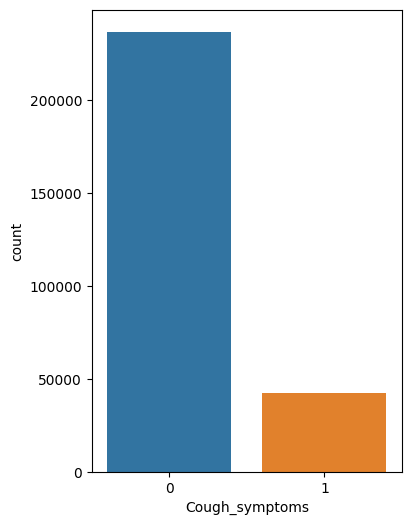

In [ ]:
plt.figure(figsize=(4,6))
ax = sns.countplot(data=df1,x=df1["Cough_symptoms"])
plt.show()


In [ ]:
df1["Cough_symptoms"].value_counts()

0    236620
1     42228
Name: Cough_symptoms, dtype: int64

In [ ]:
df1["Fever"].isna().sum()
print(df1["Fever"].unique())

[0 1]


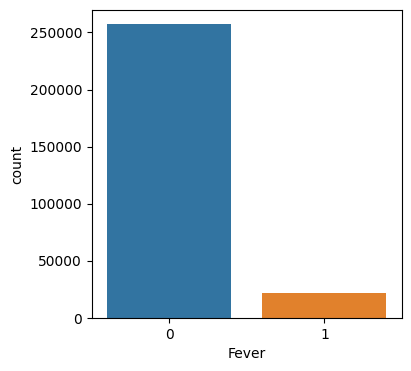

In [ ]:
plt.figure(figsize=(4,4))
ax = sns.countplot(data=df1,x=df1["Fever"])
plt.show()

In [ ]:
df1["Sore_throat"]=df1["Sore_throat"].map(mapping)

In [ ]:
df1["Sore_throat"].value_counts()

0    276922
1      1926
Name: Sore_throat, dtype: int64

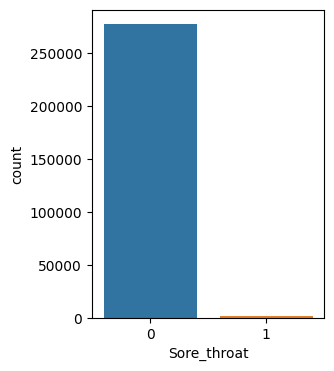

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(data=df1,x=df1["Sore_throat"])
plt.show()

In [ ]:
print(df1["Shortness_of_breath"].value_counts())
df1["Shortness_of_breath"]=df1["Shortness_of_breath"].map(mapping)

False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64


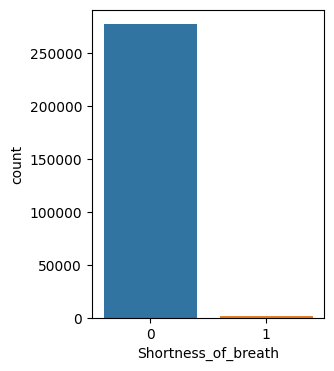

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(data=df1,x=df1["Shortness_of_breath"])
plt.show()

In [ ]:
print(df1["Headache"].value_counts())
df1["Headache"]=df1["Headache"].map(mapping)

False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64


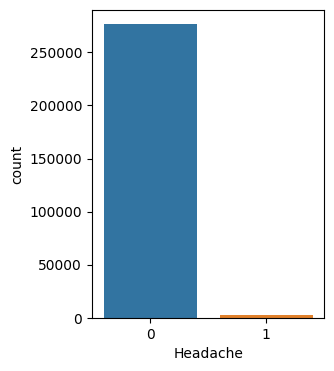

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(data=df1,x=df1["Headache"])
plt.show()

In [ ]:
print(df1["Corona"].value_counts())
df1["Corona"]=df1["Corona"].map({"negative":0,"positive":1,"other":0})

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64


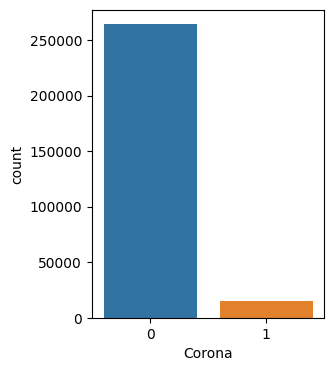

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(data=df1,x=df1["Corona"])
plt.show()

In [ ]:
df1["Age_60_above"].value_counts()
# df1=df1.drop("Age_60_above",axis=1)

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

In [ ]:
df1["Sex"].value_counts()

female    130158
male      129127
None       19563
Name: Sex, dtype: int64

In [ ]:
df1["Sex"]=df1["Sex"].replace("None",np.nan)
df1["Sex"]=df1["Sex"].fillna(method="ffill")
df1["Sex"].value_counts()
#df1=df1.drop("Sex",axis=1)

female    132974
male      132147
Name: Sex, dtype: int64

In [ ]:
df1.head(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,1,0,1,0,0,0,None,NaN,Abroad
1,2,11-03-2020,0,1,0,0,0,1,None,NaN,Abroad
2,3,11-03-2020,0,1,0,0,0,1,None,NaN,Abroad
3,4,11-03-2020,1,0,0,0,0,0,None,NaN,Abroad
4,5,11-03-2020,1,0,0,0,0,0,None,NaN,Contact with confirmed


In [ ]:
df1.to_csv('C:\\Users\\Ashish\\Desktop\\coronadata.csv')

In [ ]:
print(df1["Known_contact"].value_counts())
df1["Known_contact"]=df1["Known_contact"].map({"Other":0,"Abroad":1,"Contact with confirmed":2})

Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64


In [ ]:
df1.isnull().sum()

Ind_ID                     0
Test_date                  0
Cough_symptoms             0
Fever                      0
Sore_throat                0
Shortness_of_breath        0
Headache                   0
Corona                     0
Age_60_above               0
Sex                    13727
Known_contact              0
dtype: int64

In [ ]:
df1.tail(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,0,0,0,0,0,1,None,male,0
278844,278845,30-04-2020,0,0,0,0,0,0,None,female,0
278845,278846,30-04-2020,0,0,0,0,0,0,None,male,0
278846,278847,30-04-2020,0,0,0,0,0,0,None,male,0
278847,278848,30-04-2020,0,0,0,0,0,0,None,female,0


**Dropping irrelevant columns**

In [ ]:
df1=df1.drop(["Test_date","Ind_ID","Sex"],axis=1)

In [ ]:
df1=df1.drop(["Age_60_above"],axis=1)  # Too many missing values

**Checking the cleaned dataset**

In [ ]:
df1.head(5)

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
0,1,0,1,0,0,0,1
1,0,1,0,0,0,1,1
2,0,1,0,0,0,1,1
3,1,0,0,0,0,0,1
4,1,0,0,0,0,0,2


**Splitting the datasets into features and label**

In [ ]:
X1=pd.DataFrame(df1.iloc[:,:-2].values)
X2=pd.DataFrame(df1.iloc[:,-1].values)
X=pd.concat([X1,X2],axis=1)
print(X)
Y=df1.iloc[:,-2]

        0  1  2  3  4  0
0       1  0  1  0  0  1
1       0  1  0  0  0  1
2       0  1  0  0  0  1
3       1  0  0  0  0  1
4       1  0  0  0  0  2
...    .. .. .. .. .. ..
278843  0  0  0  0  0  0
278844  0  0  0  0  0  0
278845  0  0  0  0  0  0
278846  0  0  0  0  0  0
278847  0  0  0  0  0  0

[278848 rows x 6 columns]


**Dividing the dataset into test, train and validation dataset**

In [ ]:
from sklearn.model_selection import train_test_split
x_main,x_test,y_main,y_test=train_test_split(X,Y,test_size=.3)
x_train,x_val,y_train,y_val=train_test_split(x_main,y_main,test_size=.2)

**Model building the checking the accuracy**


In [ ]:
# Importing various models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(x_main,y_main)

LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix
print("The accuracy score of Logistic Regression is :",round(accuracy_score(y_test,y_pred),2))
print("Confusion matrix :",confusion_matrix(y_test,y_pred))

The accuracy score of Logistic Regression is : 0.96
Confusion matrix : [[78828   411]
 [ 3014  1402]]


In [ ]:
# Random Forest
rf=RandomForestClassifier()
rf.fit(x_main,y_main)
y_pred=rf.predict(x_test)
print("The accuracy score of RandomForest Regression is :",round(accuracy_score(y_test,y_pred),2))
print("Confusion matrix :",confusion_matrix(y_test,y_pred))

The accuracy score of RandomForest Regression is : 0.97
Confusion matrix : [[78548   691]
 [ 2063  2353]]


In [ ]:
 # Decision Tree
dtr=DecisionTreeClassifier()
dtr.fit(x_main,y_main)
y_pred=dtr.predict(x_test)
print("The accuracy score of DecisionTreeRegressor training set is :",round(dtr.score(x_train,y_train),2))
print("The accuracy score of DecisionTreeRegressor test set is :",round(dtr.score(x_test,y_test),2))
print("Confusion matrix :",confusion_matrix(y_test,y_pred))

The accuracy score of DecisionTreeRegressor training set is : 0.97
The accuracy score of DecisionTreeRegressor test set is : 0.97
Confusion matrix : [[78548   691]
 [ 2063  2353]]


In [ ]:
# AdaBoostClassifier
abc = AdaBoostClassifier(base_estimator=dtr,n_estimators=400, learning_rate=1)
abc.fit(x_main,y_main)
y_pred=dtr.predict(x_test)
print("The accuracy score of AdaBoostClassifier is :",round(accuracy_score(y_test,y_pred),2))
print("Confusion matrix :",confusion_matrix(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


The accuracy score of naive_bayes is : 0.97
Confusion matrix : [[78548   691]
 [ 2063  2353]]


In [ ]:
# Naive Bayes
classifier = GaussianNB()
classifier.fit(x_main, y_main)
y_pred = classifier.predict(x_test)
print("The accuracy score of naive_bayes is :",round(accuracy_score(y_test,y_pred),2))
print("Confusion matrix :",confusion_matrix(y_test,y_pred))

The accuracy score of naive_bayes is : 0.95
Confusion matrix : [[76253  2986]
 [ 1589  2827]]


### **Cross validation**

In [ ]:
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
# Cross validation for Random forest
num_folds=5
# Creating a K-fold cross-validation object
kf=KFold(n_splits=num_folds)
# Perform cross-validation
scores=cross_val_score(rf,X,Y,cv=kf)
# Print the performace scores for each fold
for fold_idx,score in enumerate(scores,start=1):
  print(f"fold {fold_idx}:Score={score:.2f}")
# Print the average performance score across all folds
average_score=scores.mean()
print(f"average score: {average_score:.2f}")

fold 1:Score=0.95
fold 2:Score=0.96
fold 3:Score=0.95
fold 4:Score=0.98
fold 5:Score=0.99
average score: 0.97


# **Conclusion:**

The developed Models succeded in predicting corona with an accuracy greater than 95% with RandomForest,AdaBoostClassifier and Decision tree Classifier giving an accuracy of 97%.
This can help the medical industry in case of epidemic or shortage of testing equipments which can potentially save lives by taking necessary action by viewing the results from the Models.
